In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from math import isnan
import matplotlib.pyplot as plt 

df = pd.read_csv('/home/jhern/Documents/GitHub/V2B_Optimization_with_AI_on_BSS/time_series_generator/modified_data/resample_data.csv',index_col=0)
df.index = pd.to_datetime(df.index)
# df = df.iloc[:200,:]

plt.figure(figsize=(10,6), dpi=300)
flat_values = df.values.flatten().tolist()

for i in range(500):
    chunk = flat_values[i*24 : i*24 + 24]
    if any(isnan(k) for k in chunk):
        continue
    clean_lst = np.array([int(k) for k in chunk])
    diff_lst = np.array([-clean_lst[i+1]+clean_lst[i] for i in range(len(clean_lst)-1)])
    # print(clean_lst.tolist())
    
    plt.plot(diff_lst, alpha = 0.2, color = 'k')


NameError: name 'pd' is not defined

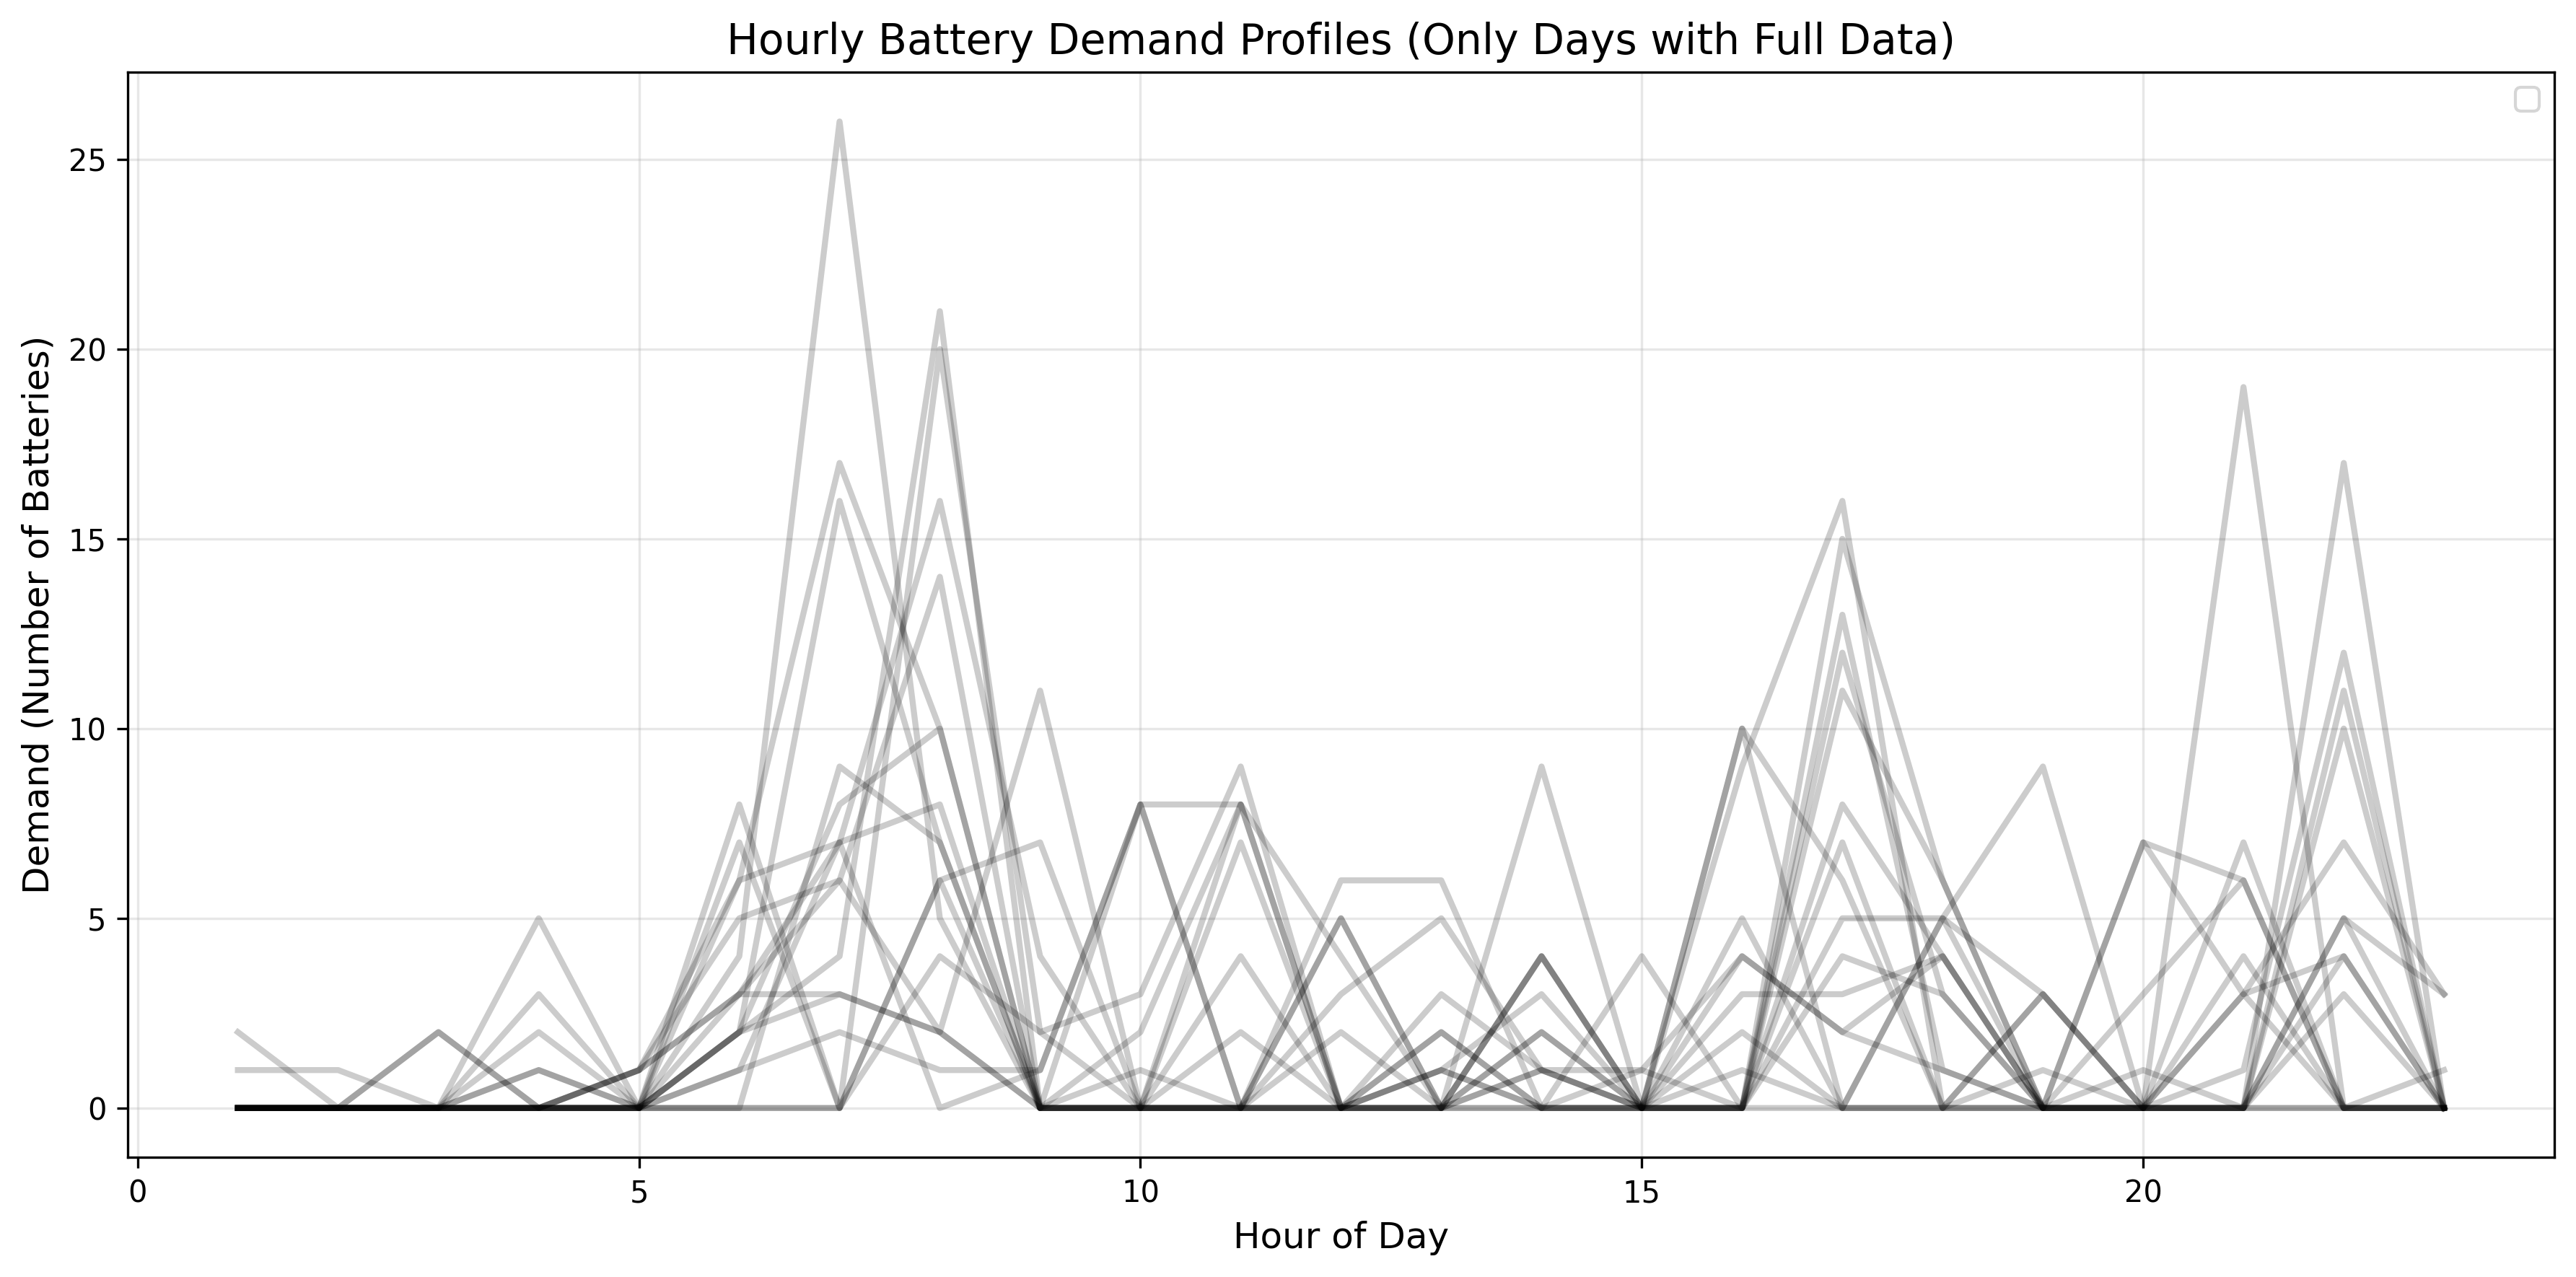

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import isnan

# Load data
df = pd.read_csv('/home/jhern/Documents/GitHub/V2B_Optimization_with_AI_on_BSS/time_series_generator/modified_data/resample_data.csv', index_col=0)
df.index = pd.to_datetime(df.index)

# Flatten to list
flat_values = df.values.flatten().tolist()

# Plot settings
plt.figure(figsize=(12, 6), dpi=300)

n_days = 500
hours_per_day = 24
count_valid_days = 0

for i in range(n_days):
    # Extract one day
    chunk = flat_values[i*hours_per_day : (i+1)*hours_per_day]
    if len(chunk) < hours_per_day or any(isnan(k) for k in chunk):
        continue  # skip incomplete or NaN days

    # Convert to int
    clean_lst = np.array([int(k) for k in chunk])

    # Compute hourly difference
    diff_lst = np.diff(clean_lst)

    # Demand = negative differences only
    demand_profile = np.where(diff_lst < 0, -diff_lst, 0)  # positive numbers for demand

    if demand_profile.sum() == 0:
        continue  # optional: skip days with zero demand entirely

    count_valid_days += 1
    plt.plot(range(1, hours_per_day), demand_profile, alpha=0.2, color='k', label='_nolegend_', linewidth = 2)

# Labels and title
plt.title('Hourly Battery Demand Profiles (Only Days with Full Data)', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Demand (Number of Batteries)', fontsize=12)
plt.legend([f"{count_valid_days} valid days"], loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Collected 18 valid days.


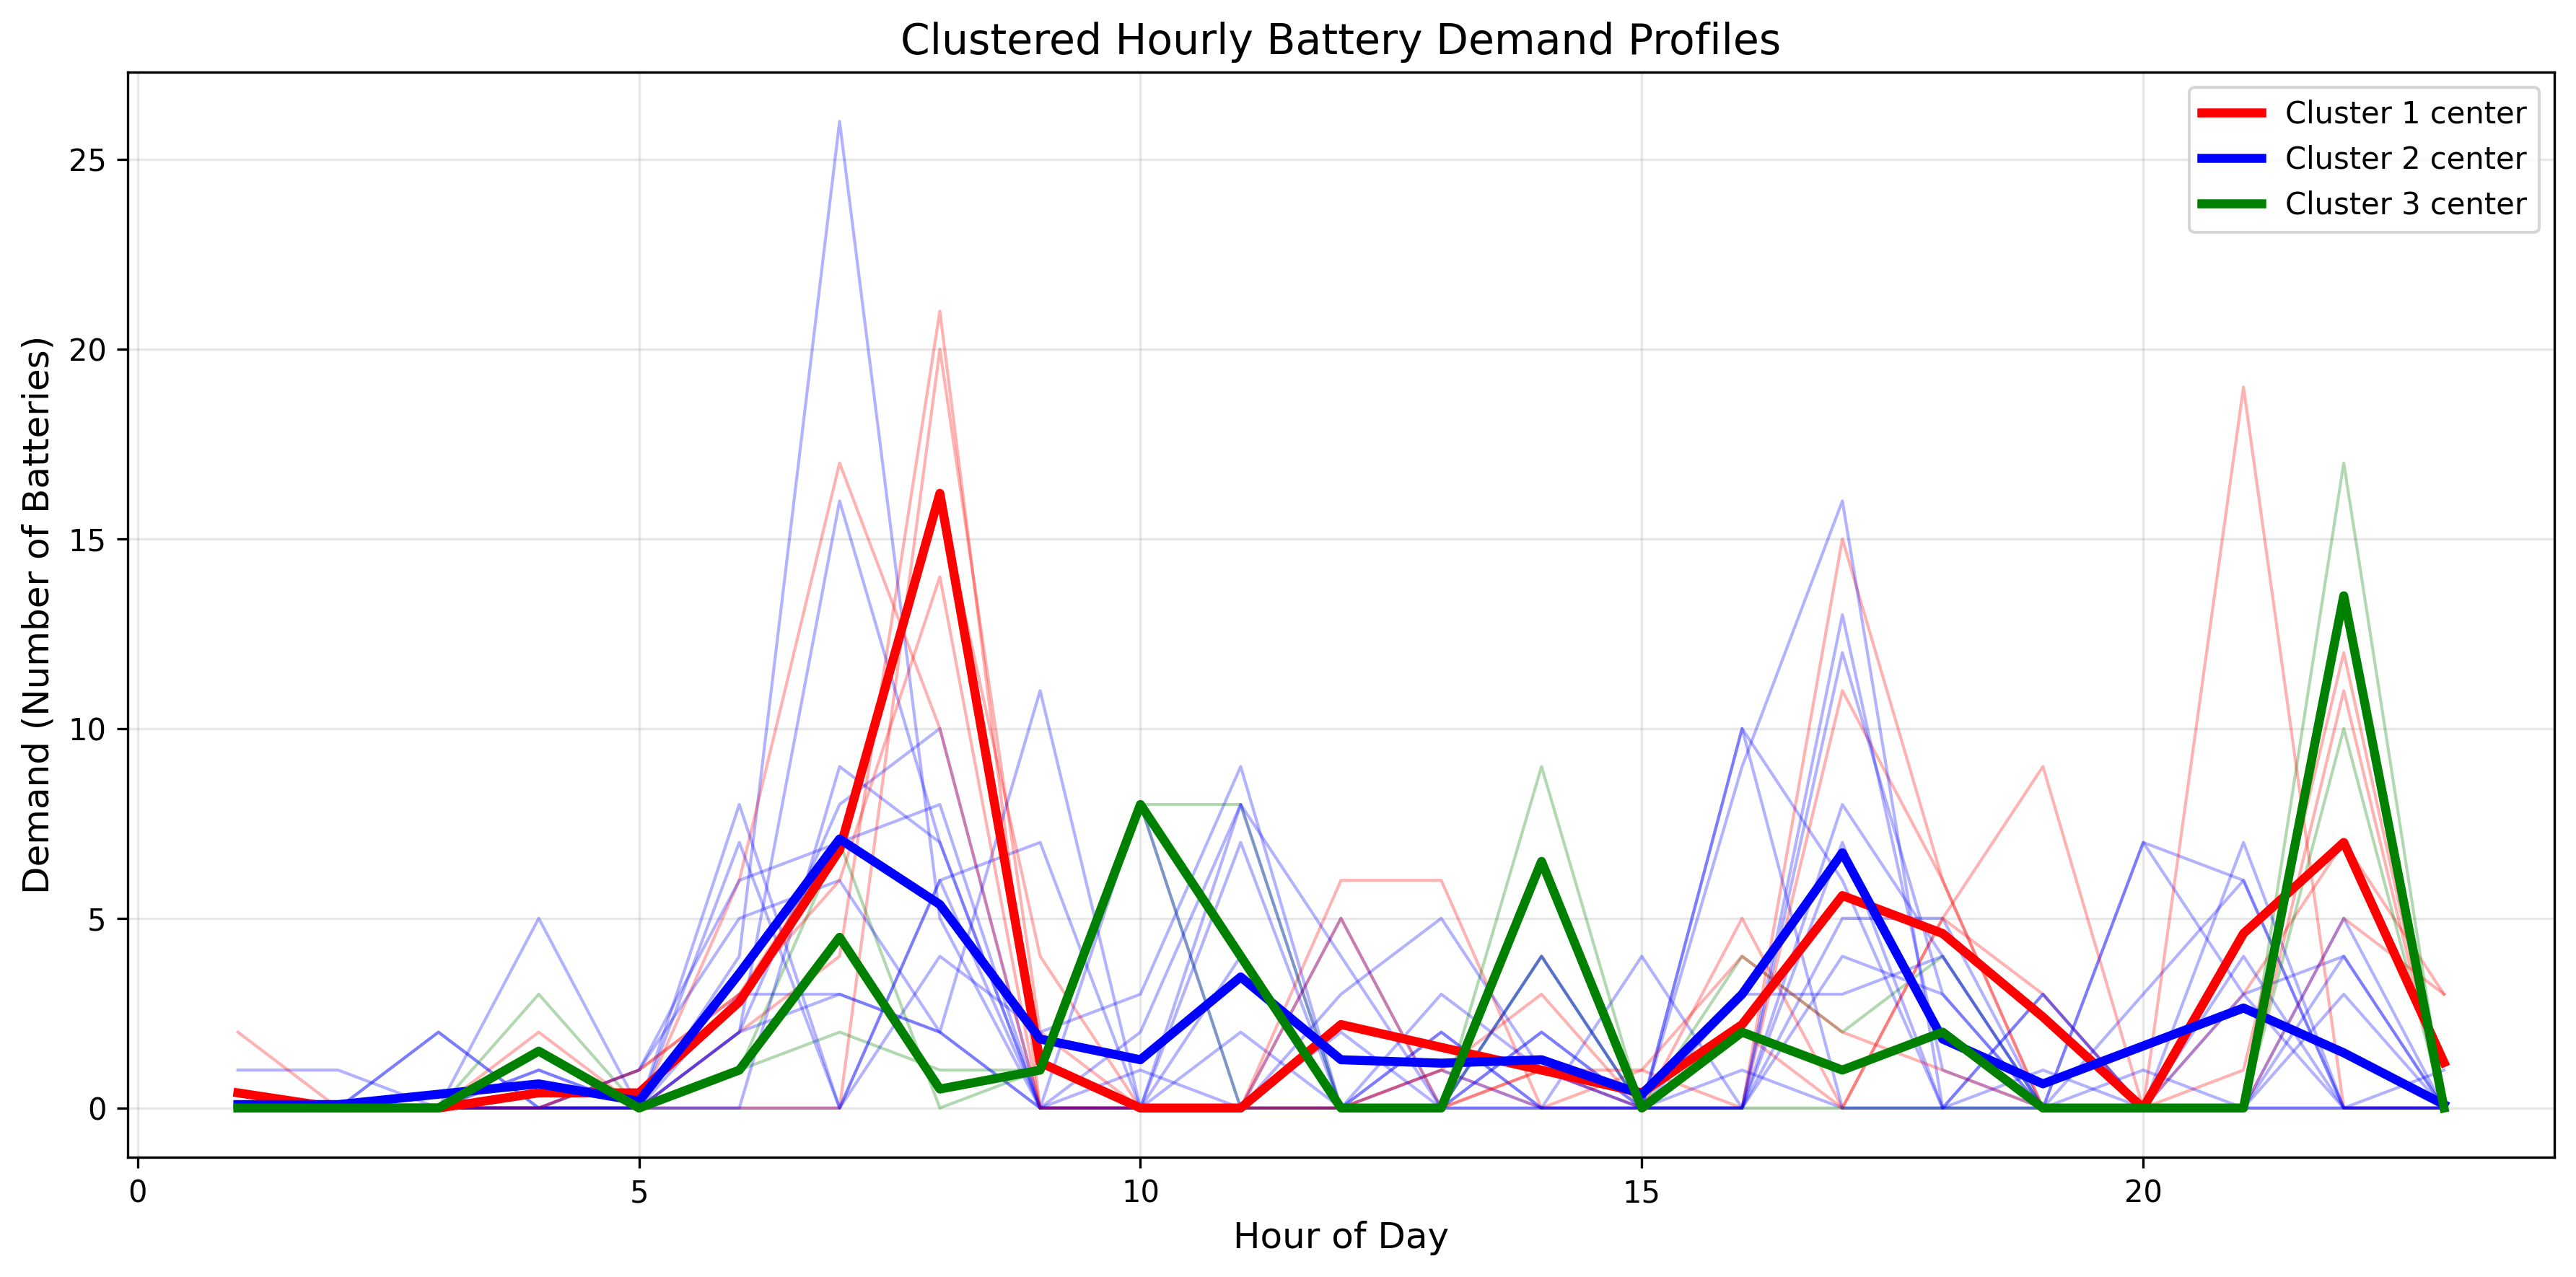

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import isnan
from sklearn.cluster import KMeans

# Load data
df = pd.read_csv('/home/jhern/Documents/GitHub/V2B_Optimization_with_AI_on_BSS/time_series_generator/modified_data/resample_data.csv', index_col=0)
df.index = pd.to_datetime(df.index)

# Flatten to list
flat_values = df.values.flatten().tolist()

# Parameters
n_days = 500
hours_per_day = 24

# Collect valid demand profiles
valid_profiles = []

for i in range(n_days):
    chunk = flat_values[i*hours_per_day : (i+1)*hours_per_day]
    if len(chunk) < hours_per_day or any(isnan(k) for k in chunk):
        continue

    clean_lst = np.array([int(k) for k in chunk])
    diff_lst = np.diff(clean_lst)
    demand_profile = np.where(diff_lst < 0, -diff_lst, 0)

    if demand_profile.sum() == 0:
        continue

    valid_profiles.append(demand_profile)

# Convert to numpy array for clustering
X = np.array(valid_profiles)
print(f"Collected {X.shape[0]} valid days.")

# Cluster them (e.g., 3 groups)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Plotting
plt.figure(figsize=(12, 6), dpi=300)
colors = ['red', 'blue', 'green']

for i in range(X.shape[0]):
    plt.plot(range(1, hours_per_day), X[i], alpha=0.3, color=colors[labels[i]], linewidth=1)

# Add cluster centers for reference
for idx, center in enumerate(kmeans.cluster_centers_):
    plt.plot(range(1, hours_per_day), center, color=colors[idx], linewidth=3, label=f'Cluster {idx+1} center')

# Labels and title
plt.title('Clustered Hourly Battery Demand Profiles', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Demand (Number of Batteries)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [26]:
print(df.index.tolist()[24:24+24])

[Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-02 01:00:00'), Timestamp('2023-01-02 02:00:00'), Timestamp('2023-01-02 03:00:00'), Timestamp('2023-01-02 04:00:00'), Timestamp('2023-01-02 05:00:00'), Timestamp('2023-01-02 06:00:00'), Timestamp('2023-01-02 07:00:00'), Timestamp('2023-01-02 08:00:00'), Timestamp('2023-01-02 09:00:00'), Timestamp('2023-01-02 10:00:00'), Timestamp('2023-01-02 11:00:00'), Timestamp('2023-01-02 12:00:00'), Timestamp('2023-01-02 13:00:00'), Timestamp('2023-01-02 14:00:00'), Timestamp('2023-01-02 15:00:00'), Timestamp('2023-01-02 16:00:00'), Timestamp('2023-01-02 17:00:00'), Timestamp('2023-01-02 18:00:00'), Timestamp('2023-01-02 19:00:00'), Timestamp('2023-01-02 20:00:00'), Timestamp('2023-01-02 21:00:00'), Timestamp('2023-01-02 22:00:00'), Timestamp('2023-01-02 23:00:00')]


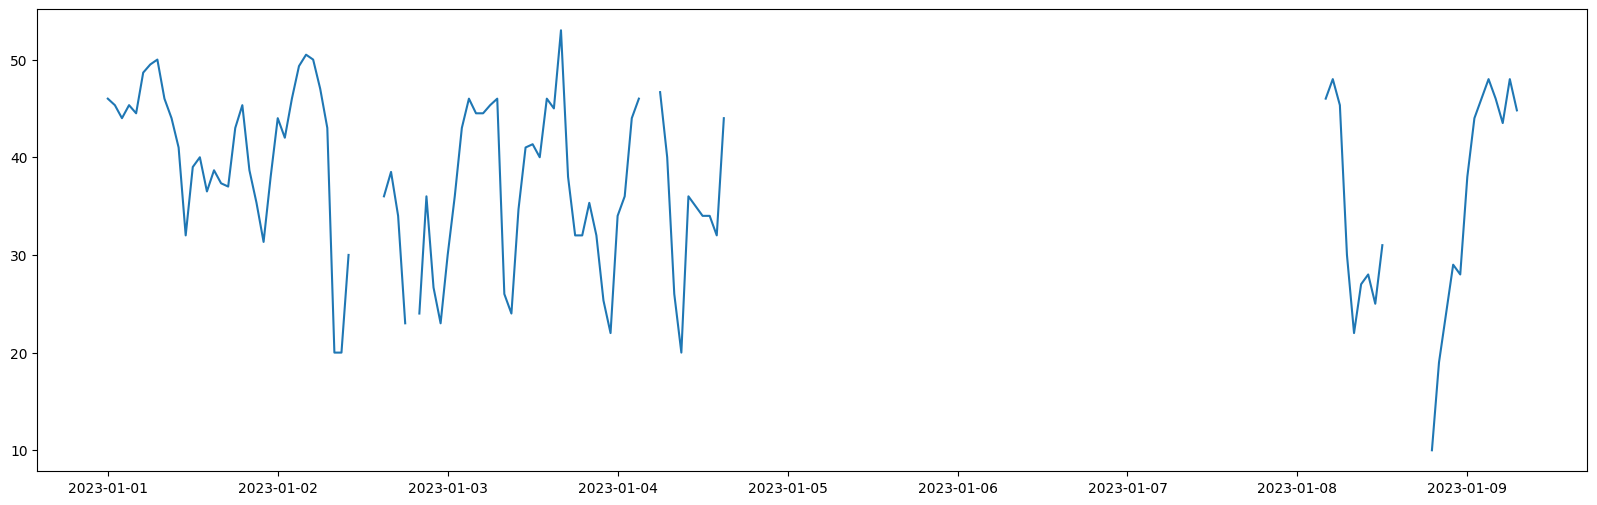

In [16]:
plt.figure(figsize=(20,6))
plt.plot(df.index,df.values)